<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/Financial_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
import spacy

from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/for_my_Thinkful_work/master/datas/all-data.csv', sep=',',
                 encoding = 'latin-1', names=['category', 'comment'])
df.head()

,category,comment
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4846 non-null   object
 1   comment   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


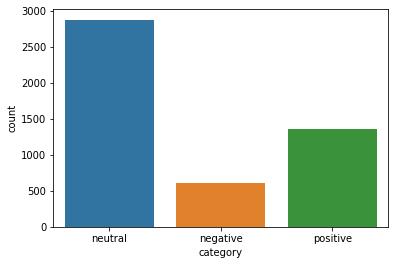

In [5]:
sns.countplot(x='category', data=df)

In [6]:
#preprocessing

In [7]:
#checking for null values
for col in ['comment', 'category']:
    print(df[col].isna().mean())

0.0
0.0


In [8]:
df['category'].value_counts()

neutral     2879
positive    1363
negative     604
Name: category, dtype: int64

In [9]:
#removing punctuations:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['comment'] = df['comment'].apply(lambda x: remove_punct(x))
df.head()

,category,comment
0,neutral,According to Gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company s updated strategy fo...


In [10]:
#!python -m spacy download en

In [11]:
#removing stoprwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
#got the clean data, dropping the comment column

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
stopword = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopword])

df["clean"] = df["comment"].apply(lambda text: remove_stopwords(text))
df.head()

,category,comment,clean
0,neutral,According to Gran the company has no plans to...,According Gran company plans move production R...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans develop stages area less squ...
2,negative,The international electronic industry company ...,The international electronic industry company ...
3,positive,With the new production plant the company woul...,With new production plant company would increa...
4,positive,According to the company s updated strategy fo...,According company updated strategy years Baswa...


In [13]:
df = df.drop(['comment'], axis=1)
df.head()

,category,clean
0,neutral,According Gran company plans move production R...
1,neutral,Technopolis plans develop stages area less squ...
2,negative,The international electronic industry company ...
3,positive,With new production plant company would increa...
4,positive,According company updated strategy years Baswa...


In [14]:
#stemming and lemmatizing

In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemma(text):
  return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df['clean'].apply(lambda text: lemma(text))

0       According Gran company plan move production Ru...
1       Technopolis plan develop stage area le square ...
2       The international electronic industry company ...
3       With new production plant company would increa...
4       According company updated strategy year Baswar...
                              ...                        
4841    LONDON MarketWatch Share price ended lower Lon...
4842    Rinkuskiai beer sale fell per cent million lit...
4843    Operating profit fell EUR mn EUR mn including ...
4844    Net sale Paper segment decreased EUR mn second...
4845    Sales Finland decreased January sale outside F...
Name: clean, Length: 4846, dtype: object

In [16]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
def stem(text):
  return ' '.join([stemmer.stem(word) for word in text.split()])
df['clean'].apply(lambda text: stem(text))

0       accord gran compani plan move product russia a...
1       technopoli plan develop stage area less squar ...
2       the intern electron industri compani elcoteq l...
3       with new product plant compani would increas c...
4       accord compani updat strategi year baswar targ...
                              ...                        
4841    london marketwatch share price end lower londo...
4842    rinkuskiai beer sale fell per cent million lit...
4843    oper profit fell eur mn eur mn includ vessel s...
4844    net sale paper segment decreas eur mn second q...
4845    sale finland decreas januari sale outsid finla...
Name: clean, Length: 4846, dtype: object

In [17]:
#label encoding
from sklearn.preprocessing import LabelEncoder
df['cat'] = LabelEncoder().fit_transform(df['category'])
df[["category", "cat"]] 

,category,cat
0,neutral,1
1,neutral,1
2,negative,0
3,positive,2
4,positive,2
...,...,...
4841,negative,0
4842,neutral,1
4843,negative,0
4844,negative,0


In [18]:
def clean_data(text):
  clean_text = []
  for w in word_tokenize(text):
    if w.lower() not in []:
      pos = pos_tag([w])
      new = lemmatizer.lemmatize(w, pos = get_pos(pos[0][1]))
      clean_text.append(new)
  return clean_text
def join_text(text):
  return ' '.join(text)
  #df['clean'].apply(lambda text: stem(text))
  

In [19]:
def lower_txt(text):
  lower_txt = text.lower()
  return(lower_txt)
df['clean'].apply(lower_txt)

0       according gran company plans move production r...
1       technopolis plans develop stages area less squ...
2       the international electronic industry company ...
3       with new production plant company would increa...
4       according company updated strategy years baswa...
                              ...                        
4841    london marketwatch share prices ended lower lo...
4842    rinkuskiai beer sales fell per cent million li...
4843    operating profit fell eur mn eur mn including ...
4844    net sales paper segment decreased eur mn secon...
4845    sales finland decreased january sales outside ...
Name: clean, Length: 4846, dtype: object

In [20]:
df.head()

,category,clean,cat
0,neutral,According Gran company plans move production R...,1
1,neutral,Technopolis plans develop stages area less squ...,1
2,negative,The international electronic industry company ...,0
3,positive,With new production plant company would increa...,2
4,positive,According company updated strategy years Baswa...,2


In [21]:
df['clean'] = df['clean'].apply(lower_txt)

In [22]:
df = df.drop(['category'], axis=1)


In [23]:
df.head()

,clean,cat
0,according gran company plans move production r...,1
1,technopolis plans develop stages area less squ...,1
2,the international electronic industry company ...,0
3,with new production plant company would increa...,2
4,according company updated strategy years baswa...,2


In [24]:
#building a model:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.clean, df.cat, test_size= 0.2, random_state=55)

In [26]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])
LSVC = pipeline.fit(X_train, y_train)
y_pred = LSVC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.50      0.61       125
           1       0.77      0.90      0.83       571
           2       0.71      0.57      0.63       274

    accuracy                           0.76       970
   macro avg       0.75      0.66      0.69       970
weighted avg       0.75      0.76      0.75       970



In [27]:
from sklearn.metrics import classification_report, confusion_matrix


In [28]:

confusion_df = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=["True Neg.", "True Neut.", "True Pos."],
    columns=["Predicted Neg.", "Predicted Neut.", "Predicted Pos."],
)

confusion_df

,Predicted Neg.,Predicted Neut.,Predicted Pos.
True Neg.,63,45,17
True Neut.,10,515,46
True Pos.,10,108,156


In [29]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 8, 
                                           splitter='best', 
                                           random_state=55))])
DTC = pipeline.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.22      0.34       125
           1       0.67      0.96      0.79       571
           2       0.64      0.29      0.40       274

    accuracy                           0.67       970
   macro avg       0.69      0.49      0.51       970
weighted avg       0.67      0.67      0.62       970



In [30]:
confusion_df = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=["True Neg.", "True Neut.", "True Pos."],
    columns=["Predicted Neg.", "Predicted Neut.", "Predicted Pos."],
)

confusion_df

,Predicted Neg.,Predicted Neut.,Predicted Pos.
True Neg.,27,78,20
True Neut.,1,546,24
True Pos.,8,187,79


In [31]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=199))])
RFC = pipeline.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.38      0.50       125
           1       0.74      0.95      0.83       571
           2       0.74      0.48      0.58       274

    accuracy                           0.74       970
   macro avg       0.75      0.60      0.64       970
weighted avg       0.74      0.74      0.72       970



In [32]:
confusion_df = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=["True Neg.", "True Neut.", "True Pos."],
    columns=["Predicted Neg.", "Predicted Neut.", "Predicted Pos."],
)

confusion_df

,Predicted Neg.,Predicted Neut.,Predicted Pos.
True Neg.,47,56,22
True Neut.,5,542,24
True Pos.,10,133,131


So most of the feeds are neutral, that's why we see a large number of tweets on neutral column. Predicting the number of positive outputs are high in precision, which is interesting and needs to be researched more. Recall is very high on predicting the positive outcome - most likely overfitting. I am interested in working and improving it more. 